In [60]:
import os, sys
import copy
import pickle
import importlib
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 

import seaborn as sns

import scipy.stats as stats
import scipy.optimize as optimize 
from sklearn.decomposition import PCA
import scipy.signal as signal

import analysis
importlib.reload(analysis)

<module 'analysis' from '/home/masse/work/PsychADxD/7_trajectory/analysis.py'>

# Model files and parameters

In [61]:
processed_data_path = "processed_data/"
cell_names = ["EN", "IN", "Astro", "Immune", "Oligo", "OPC", "Mural", "Endo"]
data_fns = [
    "EN.h5ad",
    "IN.h5ad",
    "Astro.h5ad",
    "Immune.h5ad",
    "Oligo.h5ad",
    "OPC.h5ad",
    "Mural.h5ad",
    "Endo.h5ad",
]
data_fns = [os.path.join(processed_data_path, fn) for fn in data_fns]

# Model accuracy (Figure 7b)

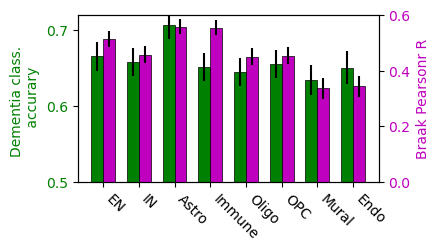

In [30]:
# Figure 7b
analysis.model_accuracy(data_fns, cell_names, n_repeats = 1_000, min_cell_count = 5, save_fig_fn = None)

# Monocle3 and Palantir pseudotime (Figure 7c and Supp. Figure 27)

In [112]:
traj_inference = analysis.TrajectoryInference("processed_data/Microglia_umap.h5ad")

In [116]:
traj_inference.compute_monocle3(n_max_repeats = 20) # using only 20 repeats to speed things up

Iteration 0 Pearsonr R = 0.180 max R = 0.180,
Iteration 1 Pearsonr R = 0.169 max R = 0.180,
Iteration 2 Pearsonr R = 0.162 max R = 0.180,
Iteration 3 Pearsonr R = 0.177 max R = 0.180,
Iteration 4 Pearsonr R = 0.178 max R = 0.180,
Iteration 5 Pearsonr R = 0.179 max R = 0.180,
Iteration 6 Pearsonr R = 0.163 max R = 0.180,
Iteration 7 Pearsonr R = 0.172 max R = 0.180,
Iteration 8 Pearsonr R = 0.172 max R = 0.180,
Iteration 9 Pearsonr R = 0.181 max R = 0.181,
Iteration 10 Pearsonr R = 0.170 max R = 0.181,
Iteration 11 Pearsonr R = 0.161 max R = 0.181,
Iteration 12 Pearsonr R = 0.176 max R = 0.181,
Iteration 13 Pearsonr R = 0.170 max R = 0.181,
Iteration 14 Pearsonr R = 0.169 max R = 0.181,
Iteration 15 Pearsonr R = 0.172 max R = 0.181,
Iteration 16 Pearsonr R = 0.169 max R = 0.181,
Iteration 17 Pearsonr R = 0.168 max R = 0.181,
Iteration 18 Pearsonr R = 0.180 max R = 0.181,
Iteration 19 Pearsonr R = 0.170 max R = 0.181,


In [114]:
traj_inference.compute_palantir(n_max_repeats = 2)

Sampling and flocking waypoints...
Time for determining waypoints: 0.18170182704925536 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.7296969175338746 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...
Iteration 0 Pearsonr R = 0.071 max R = 0.071,
Sampling and flocking waypoints...
Time for determining waypoints: 0.1804948091506958 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.6178302844365438 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption pr

/home/masse/work/PsychADxD/7_trajectory/analysis.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1, n].set_title(f"Disease pseudotime, R={r:1.3f}")


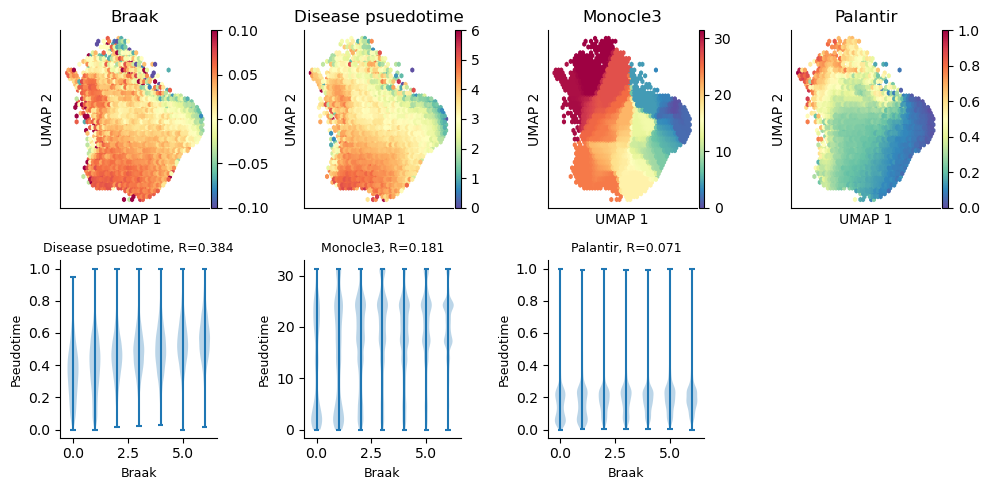

In [117]:
# Figure 7c and Supplementary Figure 27
traj_inference.generate_figure(save_fig_fn = None)

# PCA and transition points

In [36]:
gt = analysis.GlobalTrajectory(data_fns)

Number of genes: 17265
Number of eligible donors: 578
Correlation between actual and predicted Braak: 0.5373


In [37]:
gt.calculate_trajectories(k = "pred_BRAAK_AD")

In [38]:
gt.calculate_pca_transition_points(k = "pred_BRAAK_AD", n_components = 4)


/home/masse/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


 Transition times: donor 53 and donor 225


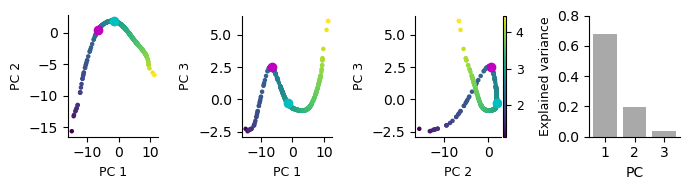

In [39]:
# Supplementary Figure 16
gt.plot_pca_figure(k = "pred_BRAAK_AD", save_fig_fn = None)

# Cell trajecotries
Used for Figures 7a&d, Supplementary Figure 17, and pathway enrichment

In [62]:
ct = analysis.CellTrajectories(
    data_fns, 
    cell_names = cell_names,  
    min_cell_count = 5,
    alpha = 4,
    edge = 0,
)

In [ ]:
ct.caclulate_cell_trajectories()

Calculating trajectories for EN...
Calculating trajectories for IN...
Calculating trajectories for Astro...
Calculating trajectories for Immune...
Calculating trajectories for Oligo...


In [ ]:
# Figure 7a
ct.plot_example_traj(gene_name = "NAV2", cell_name = "Immune", save_fig_fn = None)

In [ ]:
# Figure 7d and Supplementary Figure 17
ct.plot_nonlinearity(save_fig_fn = None)